# Credit Card Fraud Detection

## Problem Statement:
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In this project we will detect fraudulent credit card transactions with the help of Machine learning models.
We will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

## Table of Contents
1. [Importing dependencies](#p1)
2. [Exploratory data analysis](#p2)
3. [Splitting the data into train & test data](#p3)
4. [Model Building and Evaluation](#p4)


## <a name="p1">Importing Dependencies</a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## <a name="p2">Exploratory data analysis</a>

In [ ]:
# Loading the data
df = pd.read_csv('/content/software project (1).csv')
# df = pd.read_csv('./data/creditcard.csv')
df.head()

,Users,Time,Amount,Usual_Latitude,Usual_Longitude,Transactions,Curr_Latitude,Curr_Longitude,Fraud Detect
0,1,0,149.62,41.881832,-87.627500,20,41.881832,-87.123400,0
1,2,0,2.69,34.052235,-118.243683,25,34.052235,-300.456789,1
2,3,1,378.66,40.712776,-74.005974,30,40.712776,-73.987654,0
3,4,1,123.50,51.507351,-0.127758,35,51.507351,-0.987654,0
4,5,2,69.99,48.856613,2.352222,20,48.856613,3.141592,0


In [ ]:
df.rename(columns={'Fraud Detect': 'Fraud_Detect'}, inplace=True)

In [ ]:
# Checking the shape
df.shape

(19, 9)

In [ ]:
# Checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Users             19 non-null     int64  
 1   Time              19 non-null     int64  
 2   Amount            19 non-null     float64
 3     Usual_Latitude  19 non-null     float64
 4    Usual_Longitude  19 non-null     float64
 5   Transactions      19 non-null     int64  
 6   Curr_Latitude     19 non-null     float64
 7   Curr_Longitude    19 non-null     float64
 8   Fraud_Detect      19 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 1.5 KB


In [ ]:
# Checking distribution of numerical values in the dataset
df.describe()

,Users,Time,Amount,Usual_Latitude,Usual_Longitude,Transactions,Curr_Latitude,Curr_Longitude,Fraud_Detect
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,10.000000,7.210526,61.740000,29.722188,12.280065,26.263158,36.564294,-4.066567,0.210526
std,5.627314,4.916853,89.956077,30.117669,91.442113,5.576161,41.966067,124.534800,0.418854
min,1.000000,0.000000,0.890000,-37.813628,-122.419418,18.000000,-37.813628,-300.456789,0.000000
25%,5.500000,2.000000,6.395000,31.181470,-73.779983,21.500000,31.181470,-73.166666,0.000000
50%,10.000000,9.000000,27.500000,39.904202,12.568337,26.000000,39.904202,13.987654,0.000000
75%,14.500000,11.500000,81.595000,50.181982,90.514430,30.500000,52.013679,90.987654,0.000000
max,19.000000,14.000000,378.660000,55.755825,151.209296,36.000000,150.508669,150.987654,1.000000


In [ ]:
# Checking the class distribution of the target variable
df['Fraud_Detect'].value_counts()

Fraud_Detect
0    15
1     4
Name: count, dtype: int64

Fraud_Detect
0    78.947368
1    21.052632
Name: Fraud_Detect, dtype: float64


<Axes: ylabel='Fraud_Detect'>

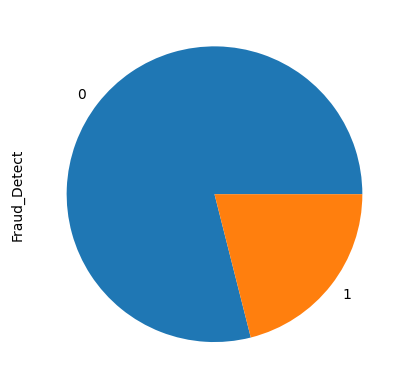

In [ ]:
# Checking the class distribution of the target variable in percentage
print((df.groupby('Fraud_Detect')['Fraud_Detect'].count()/df['Fraud_Detect'].count()) *100)
((df.groupby('Fraud_Detect')['Fraud_Detect'].count()/df['Fraud_Detect'].count()) *100).plot.pie()

In [ ]:
# Checking the correlation
corr = df.corr()
corr

,Users,Time,Amount,Usual_Latitude,Usual_Longitude,Transactions,Curr_Latitude,Curr_Longitude,Fraud_Detect
Users,1.000000,0.975833,-0.428307,-0.130484,0.318463,0.398358,0.114551,0.383100,0.047140
Time,0.975833,1.000000,-0.427347,-0.226909,0.352775,0.336260,0.004793,0.418160,-0.022717
Amount,-0.428307,-0.427347,1.000000,0.156984,-0.234133,0.082244,0.020501,-0.082924,-0.310080
Usual_Latitude,-0.130484,-0.226909,0.156984,1.000000,-0.411332,0.248268,0.819046,-0.328603,0.238356
Usual_Longitude,0.318463,0.352775,-0.234133,-0.411332,1.000000,0.064319,-0.425572,0.937348,-0.508792
Transactions,0.398358,0.336260,0.082244,0.248268,0.064319,1.000000,0.312496,0.154279,-0.048825
Curr_Latitude,0.114551,0.004793,0.020501,0.819046,-0.425572,0.312496,1.000000,-0.307240,0.495436
Curr_Longitude,0.383100,0.418160,-0.082924,-0.328603,0.937348,0.154279,-0.307240,1.000000,-0.635135
Fraud_Detect,0.047140,-0.022717,-0.310080,0.238356,-0.508792,-0.048825,0.495436,-0.635135,1.000000


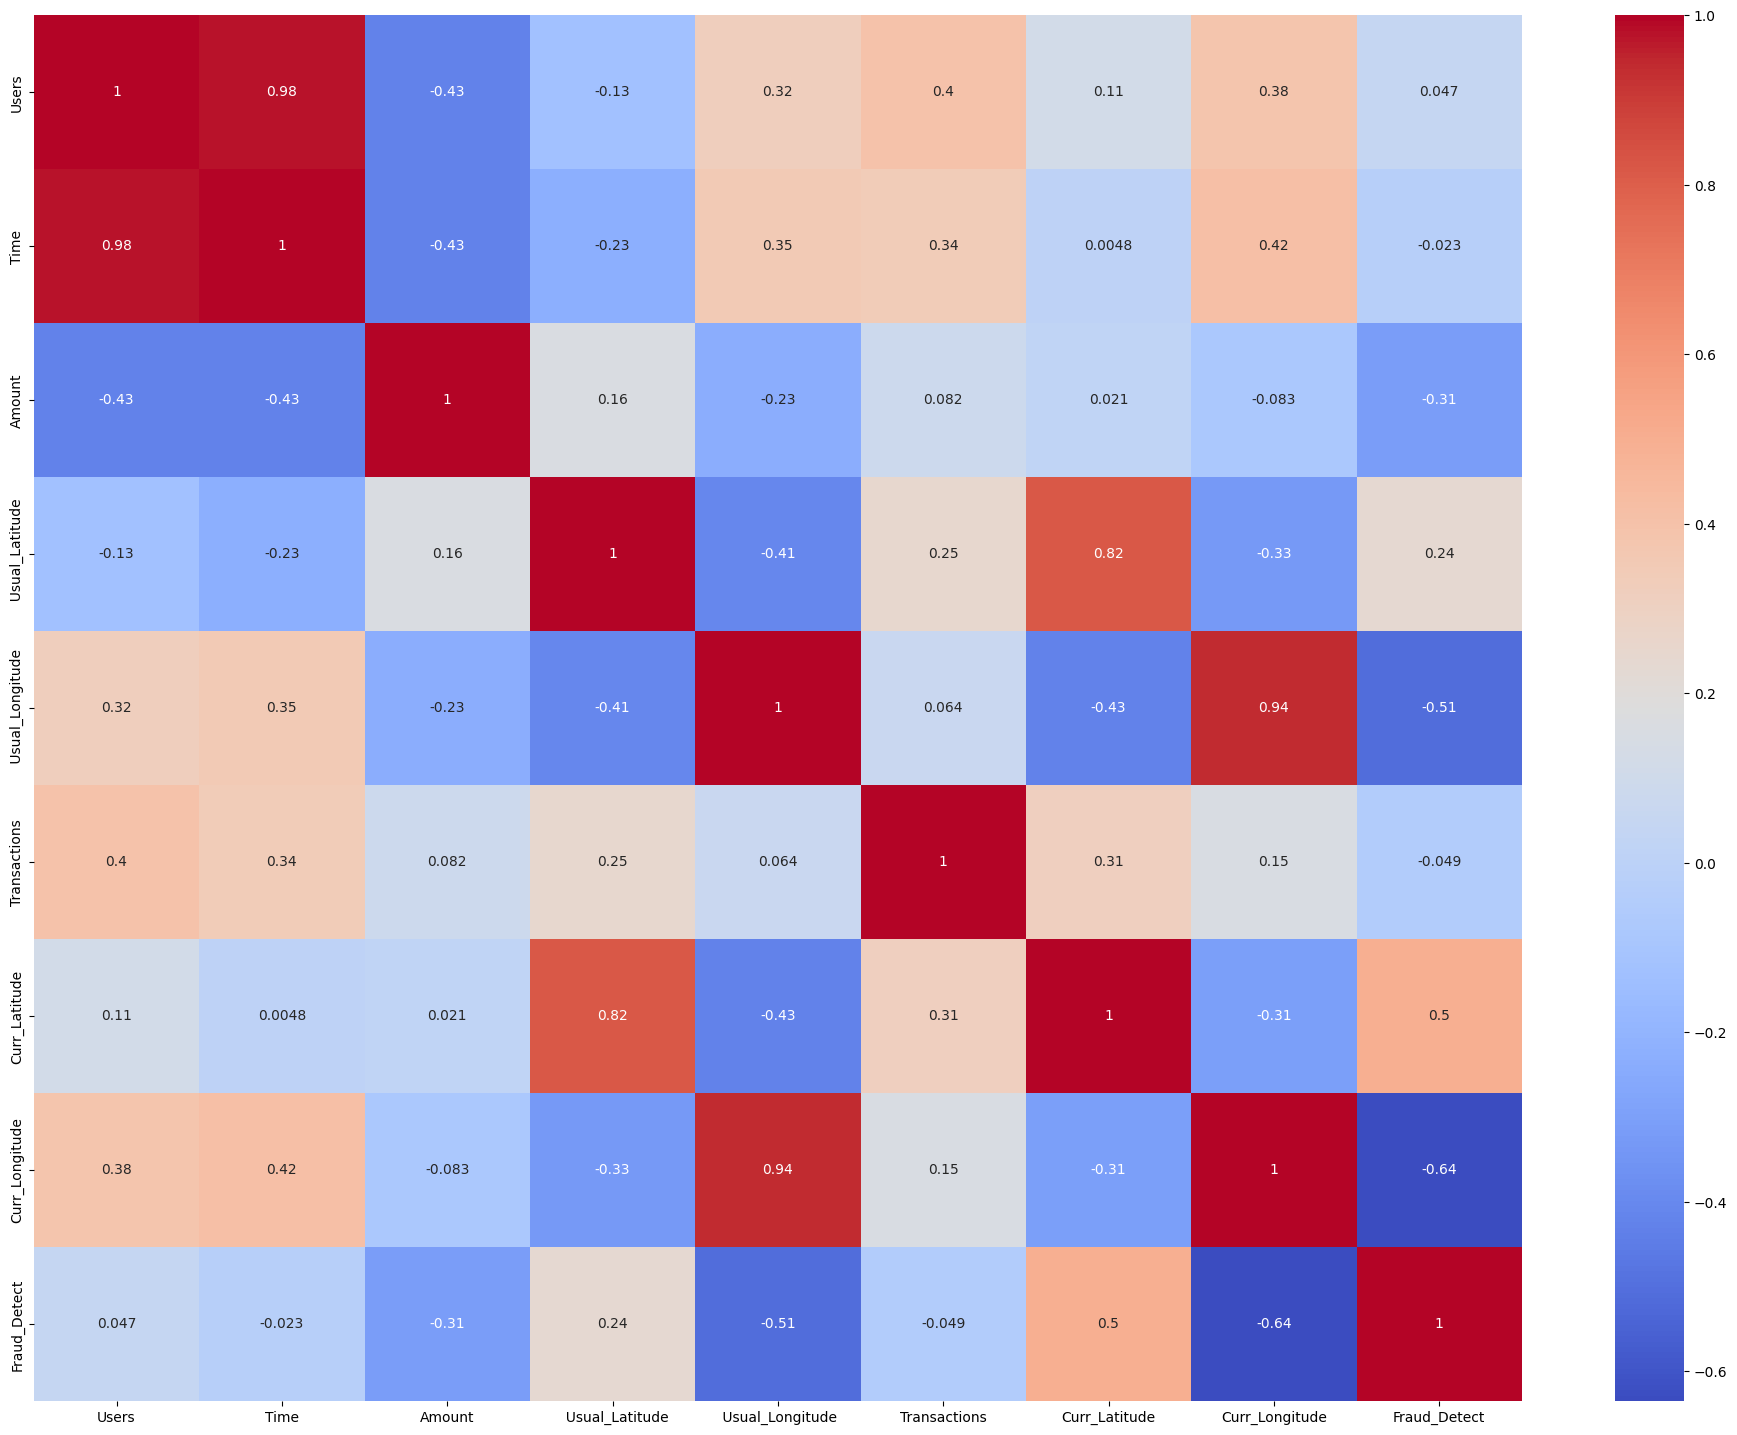

In [ ]:
# Checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

Here we will observe the distribution of our classes

In [ ]:
# Checking the % distribution of normal vs fraud
classes=df['Fraud_Detect'].value_counts()
normal_share=classes[0]/df['Fraud_Detect'].count()*100
fraud_share=classes[1]/df['Fraud_Detect'].count()*100

print(normal_share)
print(fraud_share)

78.94736842105263
21.052631578947366


In [ ]:
# As time is given in relative fashion, we are using pandas.Timedelta which Represents a duration, the difference between two times or dates.
Delta_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

In [ ]:
# Drop unnecessary columns
# We will drop Time,as we have derived the Day/Hour/Minutes from the time column
df.drop('Time', axis = 1, inplace= True)
# We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

## <a name="p3">Splitting the data into train & test data</a>

In [ ]:
# Splitting the dataset into X and y
y= df['Fraud_Detect']
X = df.drop(['Fraud_Detect'], axis=1)

In [ ]:
y

0     0
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    1
17    0
18    0
Name: Fraud_Detect, dtype: int64

In [ ]:
X

,Users,Amount,Usual_Latitude,Usual_Longitude,Transactions,Curr_Latitude,Curr_Longitude,Time_Hour
0,1,149.62,41.881832,-87.627500,20,41.881832,-87.123400,0
1,2,2.69,34.052235,-118.243683,25,34.052235,-300.456789,0
2,3,378.66,40.712776,-74.005974,30,40.712776,-73.987654,0
3,4,123.50,51.507351,-0.127758,35,51.507351,-0.987654,0
4,5,69.99,48.856613,2.352222,20,48.856613,3.141592,0
5,6,3.67,35.689487,139.691711,22,35.689487,140.123450,0
6,7,4.99,37.774929,-122.419418,18,37.774929,-253.789012,0
7,8,40.80,33.749001,-84.387978,26,33.749001,-85.678900,0
8,9,93.20,39.904202,116.407394,28,39.904202,115.678900,0
9,10,3.68,-33.868820,151.209296,21,-33.868820,150.987654,0


In [ ]:
# Checking some rows of X
X.head()

,Users,Amount,Usual_Latitude,Usual_Longitude,Transactions,Curr_Latitude,Curr_Longitude,Time_Hour
0,1,149.62,41.881832,-87.627500,20,41.881832,-87.123400,0
1,2,2.69,34.052235,-118.243683,25,34.052235,-300.456789,0
2,3,378.66,40.712776,-74.005974,30,40.712776,-73.987654,0
3,4,123.50,51.507351,-0.127758,35,51.507351,-0.987654,0
4,5,69.99,48.856613,2.352222,20,48.856613,3.141592,0


In [ ]:
# Checking some rows of y
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Fraud_Detect, dtype: int64

In [ ]:
# Splitting the dataset using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
# Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

4
3
1


Plotting the distribution of a variable

In [ ]:
# Accumulating all the column names under one variable
cols = list(X.columns.values)

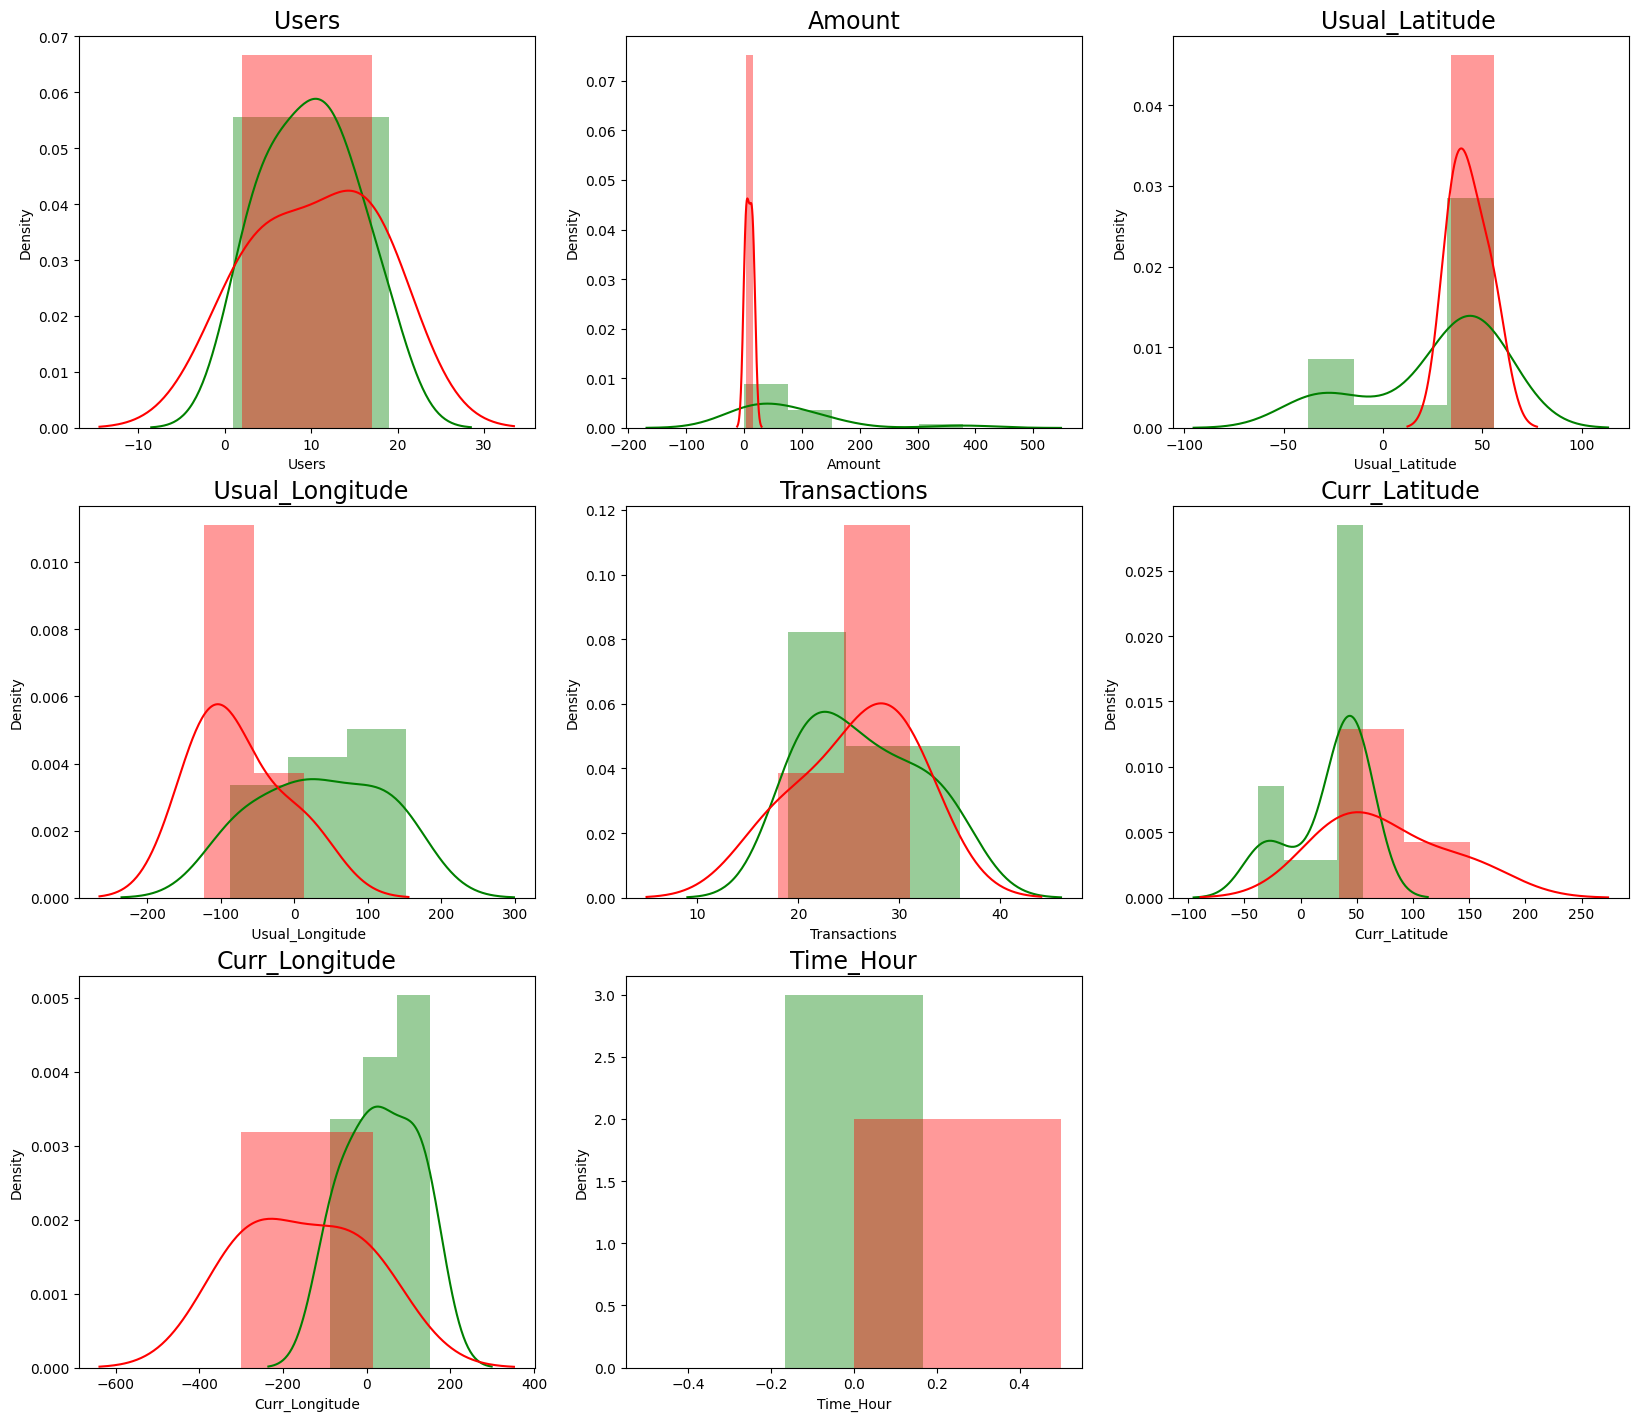

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Fraud_Detect == 0
fraud_records = df.Fraud_Detect == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## <a name="p4">Model Building</a>

- Build different models on the imbalanced dataset and see the result

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Initialize Logistic Regression with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
roc_value = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Print evaluation results
print("Logistic Regression L1")
print("Accuracy:", accuracy)
print("ROC Value:", roc_value)
print("Optimal Threshold:", optimal_threshold)


Logistic Regression L1
Accuracy: 0.75
ROC Value: 0.6666666666666667
Optimal Threshold: 0.03649646255457587


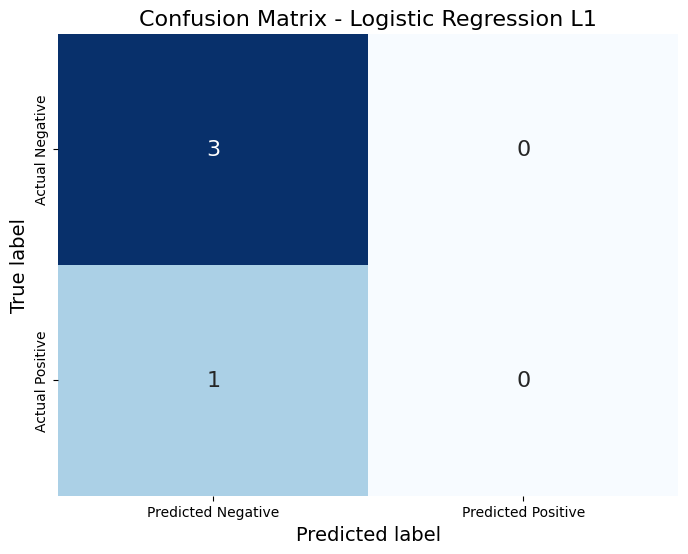

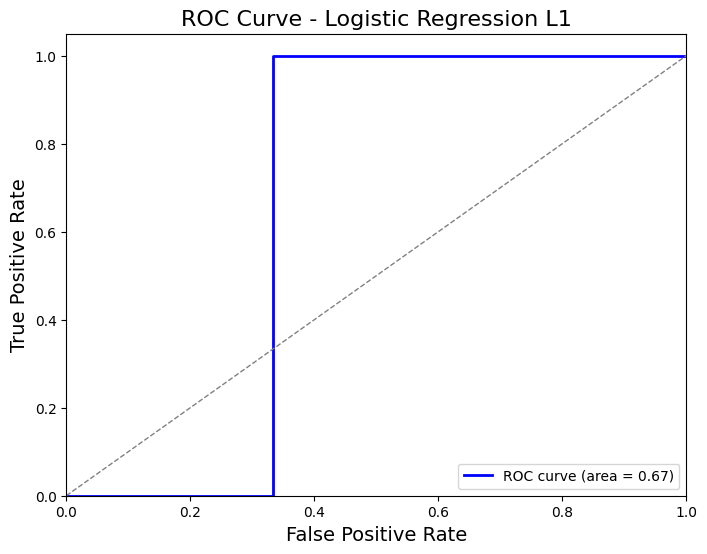

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Logistic Regression with L1 regularization
model_lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')

# Train the model
model_lr_l1.fit(X_train, y_train)

# Predict
y_pred_lr_l1 = model_lr_l1.predict(X_test)

# Confusion Matrix
cm_lr_l1 = confusion_matrix(y_test, y_pred_lr_l1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_l1, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix - Logistic Regression L1', fontsize=16)
plt.show()

# ROC-AUC Curve
fpr_lr_l1, tpr_lr_l1, thresholds_lr_l1 = roc_curve(y_test, model_lr_l1.predict_proba(X_test)[:,1])
roc_auc_lr_l1 = auc(fpr_lr_l1, tpr_lr_l1)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_l1, tpr_lr_l1, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr_l1)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - Logistic Regression L1', fontsize=16)
plt.legend(loc="lower right")
plt.show()



Logistic Regression (L2 Regularization)
Accuracy: 0.7500
ROC Value: 1.0000
Optimal Threshold: 0.0005


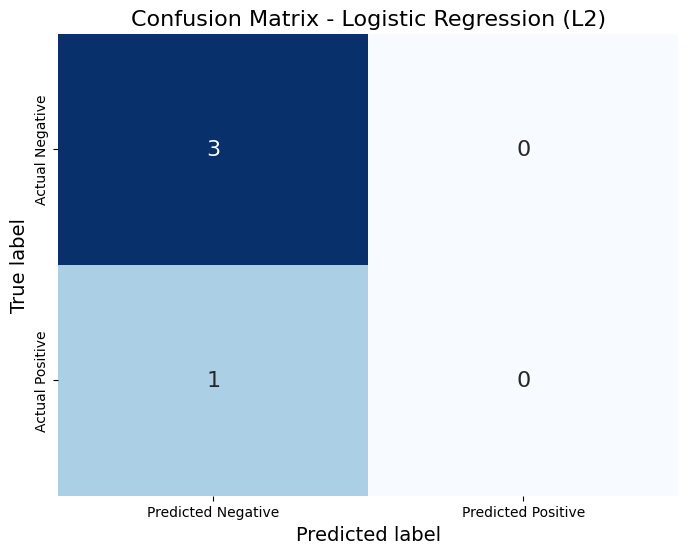

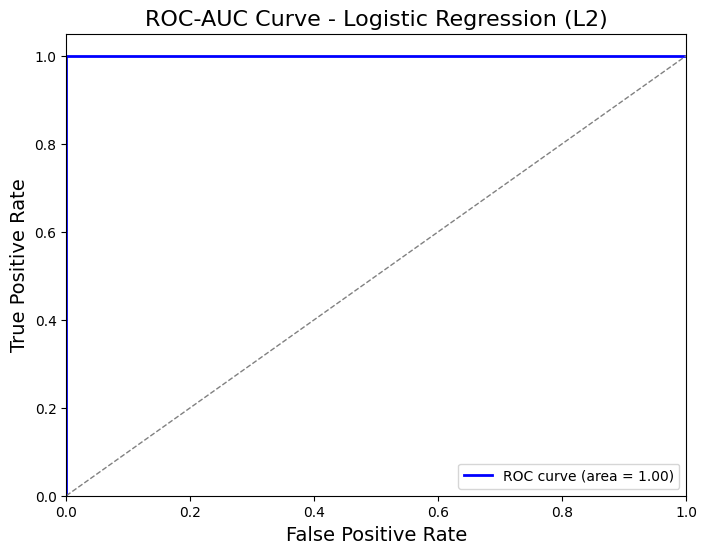

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize Logistic Regression with L2 regularization (ridge)
model_lr_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100)
model_lr_l2.fit(X_train, y_train)
y_pred_lr_l2 = model_lr_l2.predict(X_test)

# Evaluation Metrics for Logistic Regression (L2)
accuracy_lr_l2 = accuracy_score(y_test, y_pred_lr_l2)
roc_value_lr_l2 = roc_auc_score(y_test, model_lr_l2.predict_proba(X_test)[:, 1])
fpr_lr_l2, tpr_lr_l2, thresholds_lr_l2 = roc_curve(y_test, model_lr_l2.predict_proba(X_test)[:, 1])
optimal_idx_lr_l2 = np.argmax(tpr_lr_l2 - fpr_lr_l2)
optimal_threshold_lr_l2 = thresholds_lr_l2[optimal_idx_lr_l2]

print("Logistic Regression (L2 Regularization)")
print(f"Accuracy: {accuracy_lr_l2:.4f}")
print(f"ROC Value: {roc_value_lr_l2:.4f}")
print(f"Optimal Threshold: {optimal_threshold_lr_l2:.4f}")

# Confusion Matrix for Logistic Regression (L2)
cm_lr_l2 = confusion_matrix(y_test, y_pred_lr_l2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_l2, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix - Logistic Regression (L2)', fontsize=16)
plt.show()

# ROC-AUC Curve for Logistic Regression (L2)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_l2, tpr_lr_l2, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_value_lr_l2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC-AUC Curve - Logistic Regression (L2)', fontsize=16)
plt.legend(loc="lower right")
plt.show()


K-Nearest Neighbors (KNN)
Accuracy: 0.75
ROC Value: 1.0
Optimal Threshold: 0.2


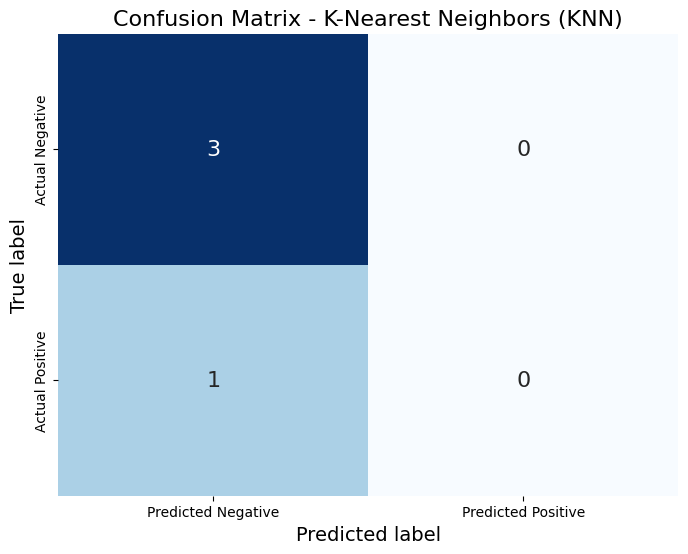

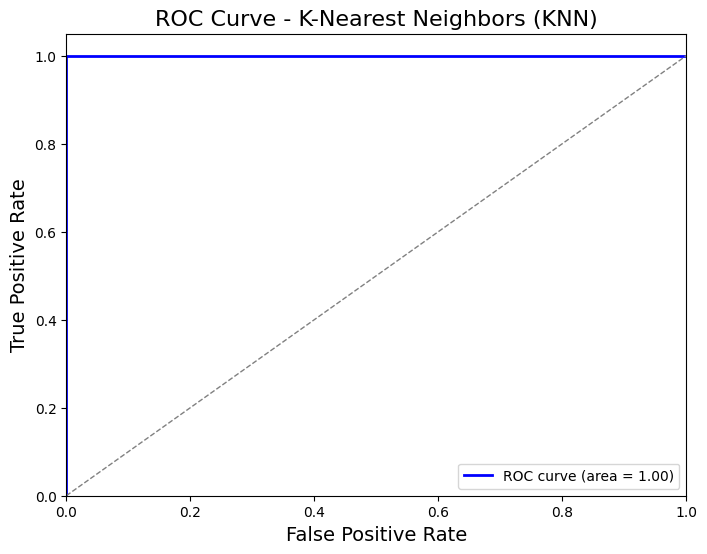

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize KNN
model_knn = KNeighborsClassifier()

# Train the model
model_knn.fit(X_train, y_train)

# Predict
y_pred_knn = model_knn.predict(X_test)

# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_value_knn = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, model_knn.predict_proba(X_test)[:,1])
optimal_idx_knn = np.argmax(tpr_knn - fpr_knn)
optimal_threshold_knn = thresholds_knn[optimal_idx_knn]

# Print evaluation results
print("K-Nearest Neighbors (KNN)")
print("Accuracy:", accuracy_knn)
print("ROC Value:", roc_value_knn)
print("Optimal Threshold:", optimal_threshold_knn)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix - K-Nearest Neighbors (KNN)', fontsize=16)
plt.show()

# ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_value_knn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - K-Nearest Neighbors (KNN)', fontsize=16)
plt.legend(loc="lower right")
plt.show()


Support Vector Machine (SVM)
Accuracy: 0.75
ROC Value: 1.0
Optimal Threshold: 0.224280399345932


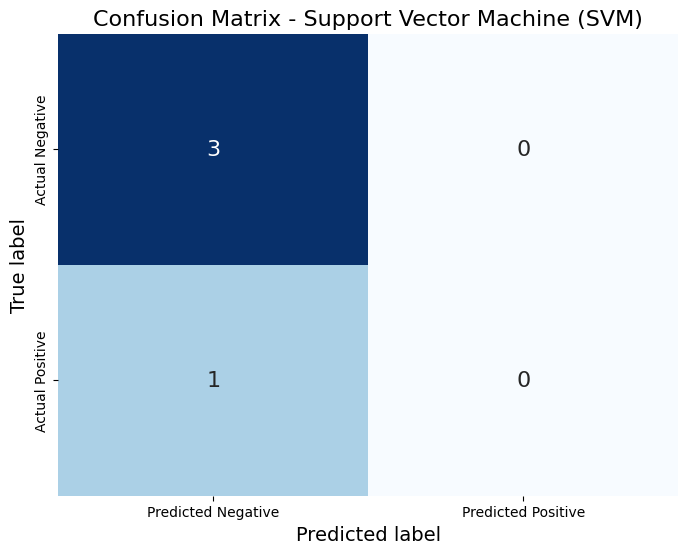

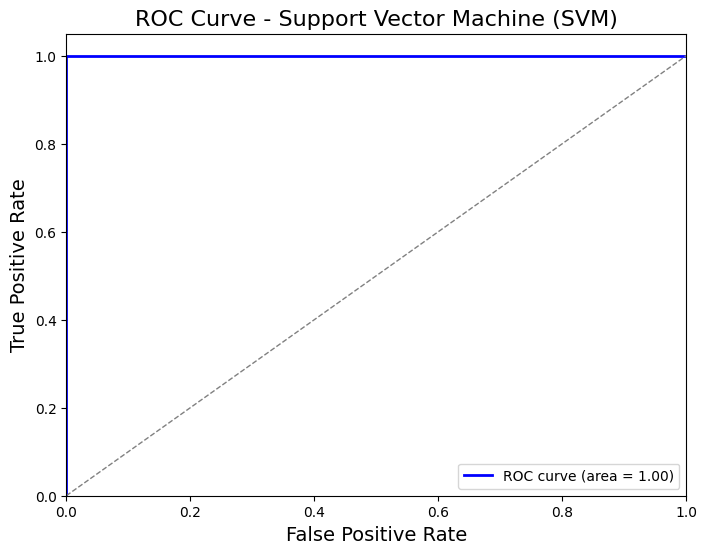

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize SVM
model_svm = SVC(kernel='linear', probability=True)

# Train the model
model_svm.fit(X_train, y_train)

# Predict
y_pred_svm = model_svm.predict(X_test)

# Evaluation Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_value_svm = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:,1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, model_svm.predict_proba(X_test)[:,1])
optimal_idx_svm = np.argmax(tpr_svm - fpr_svm)
optimal_threshold_svm = thresholds_svm[optimal_idx_svm]

# Print evaluation results
print("Support Vector Machine (SVM)")
print("Accuracy:", accuracy_svm)
print("ROC Value:", roc_value_svm)
print("Optimal Threshold:", optimal_threshold_svm)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix - Support Vector Machine (SVM)', fontsize=16)
plt.show()

# ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_value_svm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - Support Vector Machine (SVM)', fontsize=16)
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_pred_svm

array([0, 0, 0, 0])

XGBoost
Accuracy: 0.75
ROC Value: 0.5
Optimal Threshold: 0.094274886


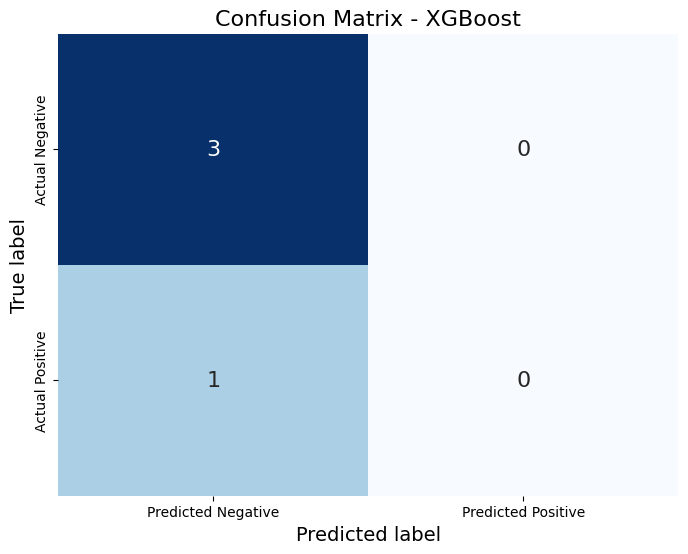

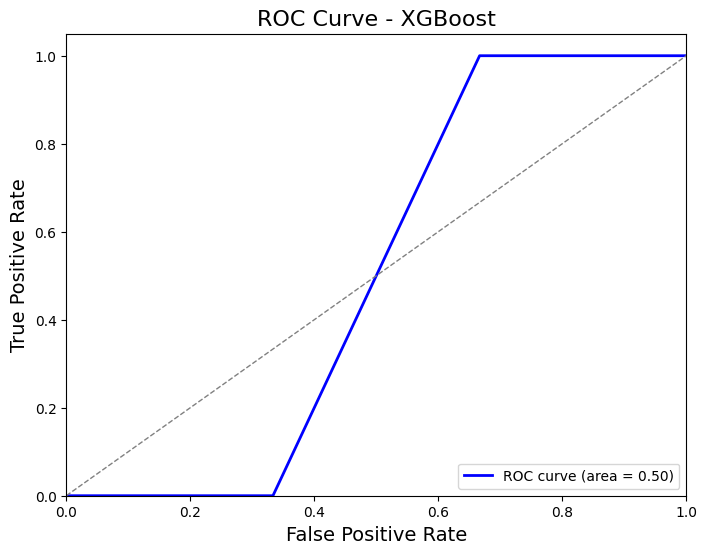

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize XGBoost
model_xgb = XGBClassifier()

# Train the model
model_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = model_xgb.predict(X_test)

# Evaluation Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_value_xgb = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, model_xgb.predict_proba(X_test)[:,1])
optimal_idx_xgb = np.argmax(tpr_xgb - fpr_xgb)
optimal_threshold_xgb = thresholds_xgb[optimal_idx_xgb]

# Print evaluation results
print("XGBoost")
print("Accuracy:", accuracy_xgb)
print("ROC Value:", roc_value_xgb)
print("Optimal Threshold:", optimal_threshold_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix - XGBoost', fontsize=16)
plt.show()

# ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_value_xgb)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - XGBoost', fontsize=16)
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_pred_xgb

array([0, 0, 0, 0])

Decision Tree (Gini)
Accuracy: 0.7500
ROC Value: 0.5000
Optimal Threshold: 1.0000


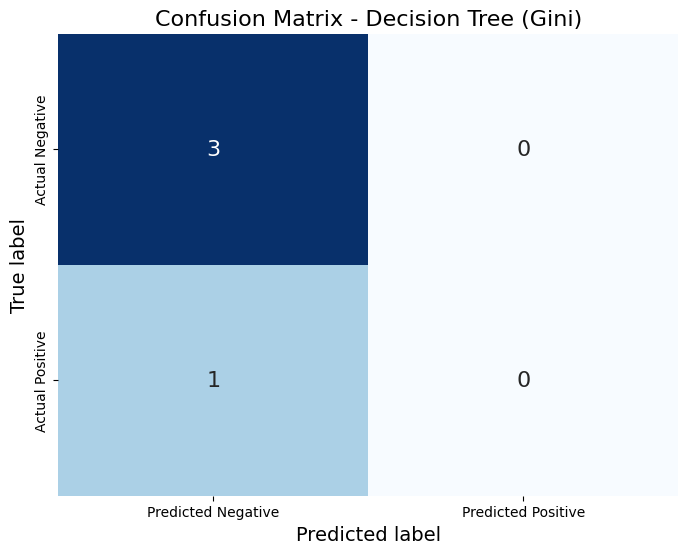

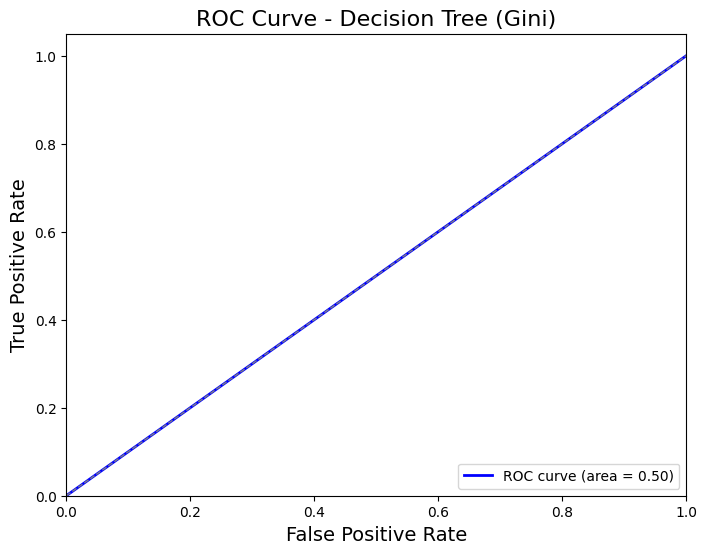


Decision Tree (Entropy)
Accuracy: 0.7500
ROC Value: 0.5000
Optimal Threshold: 1.0000


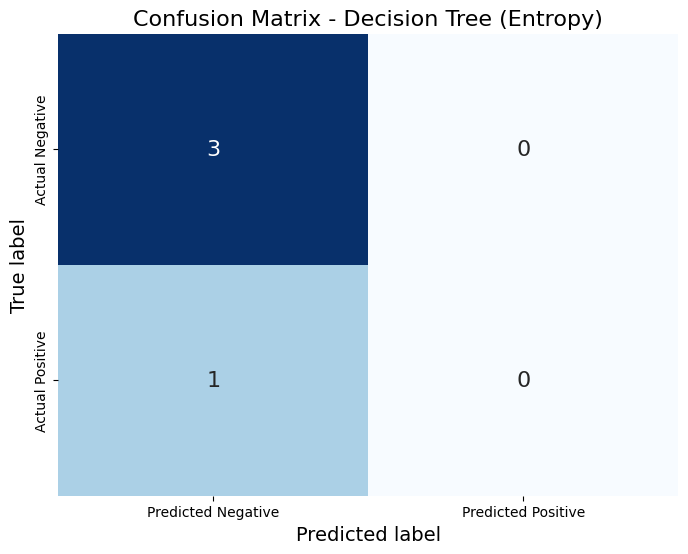

Text(0, 0.5, 'True Positive Rate')

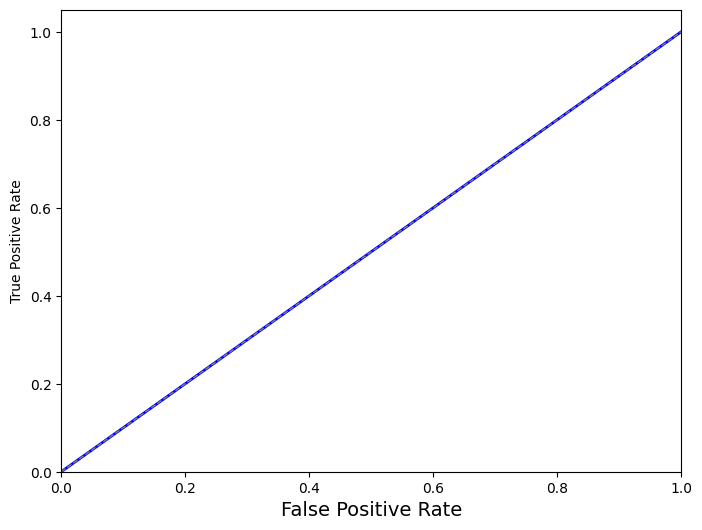

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize Decision Tree with Gini impurity
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, y_train)
y_pred_gini = model_gini.predict(X_test)

# Evaluation Metrics for Gini
accuracy_gini = accuracy_score(y_test, y_pred_gini)
roc_value_gini = roc_auc_score(y_test, model_gini.predict_proba(X_test)[:, 1])
fpr_gini, tpr_gini, thresholds_gini = roc_curve(y_test, model_gini.predict_proba(X_test)[:, 1])
optimal_idx_gini = np.argmax(tpr_gini - fpr_gini)
optimal_threshold_gini = thresholds_gini[optimal_idx_gini]

print("Decision Tree (Gini)")
print(f"Accuracy: {accuracy_gini:.4f}")
print(f"ROC Value: {roc_value_gini:.4f}")
print(f"Optimal Threshold: {optimal_threshold_gini:.4f}")

# Confusion Matrix for Gini
cm_gini = confusion_matrix(y_test, y_pred_gini)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gini, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix - Decision Tree (Gini)', fontsize=16)
plt.show()

# ROC-AUC Curve for Gini
plt.figure(figsize=(8, 6))
plt.plot(fpr_gini, tpr_gini, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_value_gini)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - Decision Tree (Gini)', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Initialize Decision Tree with Entropy
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)

# Evaluation Metrics for Entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
roc_value_entropy = roc_auc_score(y_test, model_entropy.predict_proba(X_test)[:, 1])
fpr_entropy, tpr_entropy, thresholds_entropy = roc_curve(y_test, model_entropy.predict_proba(X_test)[:, 1])
optimal_idx_entropy = np.argmax(tpr_entropy - fpr_entropy)
optimal_threshold_entropy = thresholds_entropy[optimal_idx_entropy]

print("\nDecision Tree (Entropy)")
print(f"Accuracy: {accuracy_entropy:.4f}")
print(f"ROC Value: {roc_value_entropy:.4f}")
print(f"Optimal Threshold: {optimal_threshold_entropy:.4f}")

# Confusion Matrix for Entropy
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_entropy, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix - Decision Tree (Entropy)', fontsize=16)
plt.show()

# ROC-AUC Curve for Entropy
plt.figure(figsize=(8, 6))
plt.plot(fpr_entropy, tpr_entropy, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_value_entropy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate')

In [ ]:
y_pred_entropy
y_pred_gini

array([0, 0, 0, 0])

Random Forest (Default Parameters)
Accuracy: 0.7500
ROC Value: 0.6667
Optimal Threshold: 0.1500


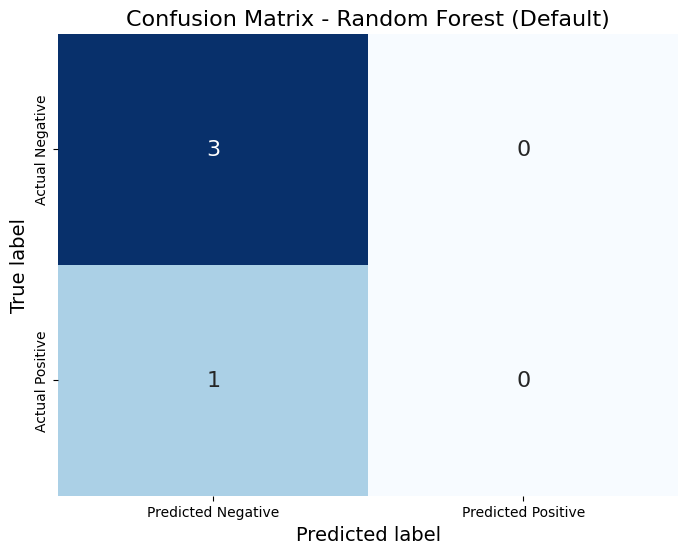

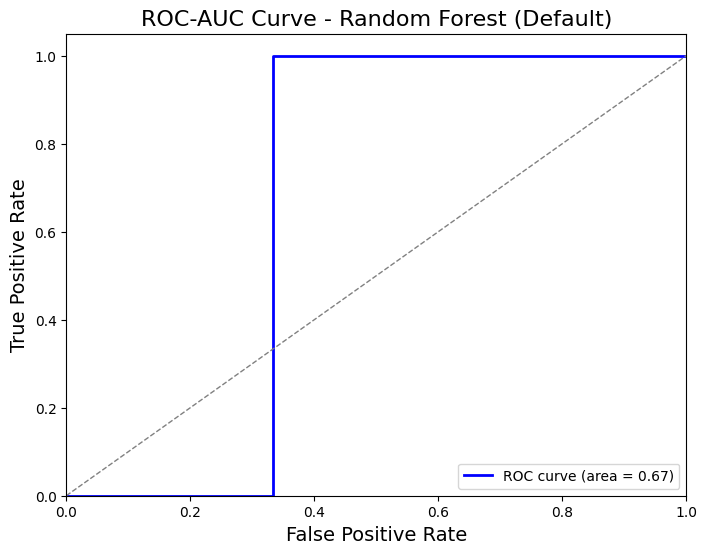

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize Random Forest with default parameters
model_rf_default = RandomForestClassifier()
model_rf_default.fit(X_train, y_train)
y_pred_rf_default = model_rf_default.predict(X_test)

# Evaluation Metrics for Random Forest (Default)
accuracy_rf_default = accuracy_score(y_test, y_pred_rf_default)
roc_value_rf_default = roc_auc_score(y_test, model_rf_default.predict_proba(X_test)[:, 1])
fpr_rf_default, tpr_rf_default, thresholds_rf_default = roc_curve(y_test, model_rf_default.predict_proba(X_test)[:, 1])
optimal_idx_rf_default = np.argmax(tpr_rf_default - fpr_rf_default)
optimal_threshold_rf_default = thresholds_rf_default[optimal_idx_rf_default]

print("Random Forest (Default Parameters)")
print(f"Accuracy: {accuracy_rf_default:.4f}")
print(f"ROC Value: {roc_value_rf_default:.4f}")
print(f"Optimal Threshold: {optimal_threshold_rf_default:.4f}")

# Confusion Matrix for Random Forest (Default)
cm_rf_default = confusion_matrix(y_test, y_pred_rf_default)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_default, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 16},
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix - Random Forest (Default)', fontsize=16)
plt.show()

# ROC-AUC Curve for Random Forest (Default)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_default, tpr_rf_default, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_value_rf_default)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC-AUC Curve - Random Forest (Default)', fontsize=16)
plt.legend(loc="lower right")
plt.show()
